In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
RAND_STATE_VALUE = 42
DATA_TEST_PATH = "/kaggle/input/airline-passenger-satisfaction/test.csv"
DATA_TRAIN_PATH = "/kaggle/input/airline-passenger-satisfaction/train.csv"

# Load the Data

In [3]:
df_train = pd.read_csv(DATA_TRAIN_PATH, index_col = 0)
df_test = pd.read_csv(DATA_TEST_PATH, index_col = 0)

In [4]:
df_train.columns

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [5]:
def clean_col_name(df: pd.DataFrame) -> pd.DataFrame:
    pattern = r"[\s|/|-]"
    df.columns = df.columns.str.lower()
    df.columns = df.columns.str.replace("departure", "dep")
    df.columns = df.columns.str.replace("arrival", "arr")
    df.columns = df.columns.str.replace("minutes", "mins")
    df.columns = df.columns.str.replace(pattern, "_", regex = True)
    return df

In [6]:
df_train = clean_col_name(df_train)
df_test = clean_col_name(df_test)

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       103904 non-null  int64  
 1   gender                   103904 non-null  object 
 2   customer_type            103904 non-null  object 
 3   age                      103904 non-null  int64  
 4   type_of_travel           103904 non-null  object 
 5   class                    103904 non-null  object 
 6   flight_distance          103904 non-null  int64  
 7   inflight_wifi_service    103904 non-null  int64  
 8   dep_arr_time_convenient  103904 non-null  int64  
 9   ease_of_online_booking   103904 non-null  int64  
 10  gate_location            103904 non-null  int64  
 11  food_and_drink           103904 non-null  int64  
 12  online_boarding          103904 non-null  int64  
 13  seat_comfort             103904 non-null  int64  
 14  inflight_

In [8]:
df_train.head()

,id,gender,customer_type,age,type_of_travel,class,flight_distance,inflight_wifi_service,dep_arr_time_convenient,ease_of_online_booking,...,inflight_entertainment,on_board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,dep_delay_in_mins,arr_delay_in_mins,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [9]:
df_train.describe().applymap(lambda x: f"{x:.2f}")

,id,age,flight_distance,inflight_wifi_service,dep_arr_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,on_board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,dep_delay_in_mins,arr_delay_in_mins
count,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103594.00
mean,64924.21,39.38,1189.45,2.73,3.06,2.76,2.98,3.20,3.25,3.44,3.36,3.38,3.35,3.63,3.30,3.64,3.29,14.82,15.18
std,37463.81,15.11,997.15,1.33,1.53,1.40,1.28,1.33,1.35,1.32,1.33,1.29,1.32,1.18,1.27,1.18,1.31,38.23,38.70
min,1.00,7.00,31.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
25%,32533.75,27.00,414.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,3.00,3.00,3.00,2.00,0.00,0.00
50%,64856.50,40.00,843.00,3.00,3.00,3.00,3.00,3.00,3.00,4.00,4.00,4.00,4.00,4.00,3.00,4.00,3.00,0.00,0.00
75%,97368.25,51.00,1743.00,4.00,4.00,4.00,4.00,4.00,4.00,5.00,4.00,4.00,4.00,5.00,4.00,5.00,4.00,12.00,13.00
max,129880.00,85.00,4983.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1592.00,1584.00


# Preprocessing

In [10]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [11]:
class AddScoreColumns(BaseEstimator, TransformerMixin):
    def __init__(self, service_cols):
        self.service_cols = service_cols
        self.scaler = StandardScaler()
        self.imputer = SimpleImputer(strategy = "median")
        
    def fit(self, X, y = None):
        return self

    def transform(self, X):
        X[self.service_cols] = self.imputer.fit_transform(X[self.service_cols])
        
        X["avg_score"] = X[self.service_cols].mean(axis = 1).round(2)
        X["total_score"] = X[self.service_cols].sum(axis = 1)
        
        normalized_scores = self.scaler.fit_transform(X[["avg_score", "total_score"]])
        X[["avg_score", "total_score"]] = normalized_scores
        
        return X[["avg_score", "total_score"]]

In [12]:
num_cols = df_train.select_dtypes(include = "number").drop(columns = "id").columns.to_list()
cat_cols = df_train.select_dtypes(include = "object").drop(columns = "satisfaction").columns.to_list()
service_cols = [
    "inflight_wifi_service",
    "dep_arr_time_convenient",
    "ease_of_online_booking",
    "gate_location",
    "food_and_drink",
    "online_boarding",
    "seat_comfort",
    "inflight_entertainment",
    "on_board_service",
    "leg_room_service",
    "baggage_handling",
    "checkin_service",
    "inflight_service",
    "cleanliness"
]

In [13]:
num_pipe = Pipeline(
    steps = [
        ("imputer", SimpleImputer(strategy = "median")),
        ("scaler", StandardScaler())
    ]
)
cat_pipe = Pipeline(
    steps = [
        ("imputer", SimpleImputer(strategy = "most_frequent")),
        ("encoder", OneHotEncoder(handle_unknown = "ignore", drop = "if_binary"))
    ]
)

preprocessor = ColumnTransformer(
    transformers = [
        ("score", AddScoreColumns(service_cols), service_cols),
        ("num", num_pipe, num_cols),
        ("cat", cat_pipe, cat_cols)
    ]
)

In [14]:
preprocessor

ColumnTransformer(transformers=[('score',
                                 AddScoreColumns(service_cols=['inflight_wifi_service',
                                                               'dep_arr_time_convenient',
                                                               'ease_of_online_booking',
                                                               'gate_location',
                                                               'food_and_drink',
                                                               'online_boarding',
                                                               'seat_comfort',
                                                               'inflight_entertainment',
                                                               'on_board_service',
                                                               'leg_room_service',
                                                               'baggage_handling',
                                                               'checkin_service',
                                                               'inflight_service',
                                                               'cleanliness']),
                                 ['i...
                                  'seat_comfort', 'inflight_entertainment',
                                  'on_board_service', 'leg_room_service',
                                  'baggage_handling', 'checkin_service',
                                  'inflight_service', 'cleanliness',
                                  'dep_delay_in_mins', 'arr_delay_in_mins']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore'))]),
                                 ['gender', 'customer_type', 'type_of_travel',
                                  'class'])])

In [15]:
TARGET = "satisfaction"

class_map = {
    "neutral or dissatisfied": 0, 
    "satisfied": 1
}

X_train = df_train.drop(columns = [TARGET])
X_test = df_test.drop(columns = [TARGET])

y_train = df_train[TARGET].map(class_map)
y_test = df_test[TARGET].map(class_map)

In [16]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.fit_transform(X_test)

In [17]:
X_train.shape

(103904, 26)

In [18]:
X_test.shape

(25976, 26)

# Model Creation

In [19]:
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras import layers

In [20]:
model = Sequential([
    layers.Flatten(input_shape =(X_train.shape[1],)),
    layers.Dense(32, activation = "relu"),
    layers.Dense(64, activation = "relu"),
    layers.Dense(32, activation = "relu"),
    layers.Dropout(0.2),
    layers.Dense(len(y_train.unique())),
    layers.Softmax()
])

In [21]:
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics =["accuracy"])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 26)                0         
                                                                 
 dense (Dense)               (None, 32)                864       
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 2)                 66        
                                                                 
 softmax (Softmax)           (None, 2)                 0

In [23]:
history = model.fit(X_train, y_train, epochs = 20, validation_data = (X_test, y_test), verbose = 2)

Epoch 1/20
3247/3247 - 5s - loss: 0.1937 - accuracy: 0.9220 - val_loss: 0.1411 - val_accuracy: 0.9434 - 5s/epoch - 2ms/step
Epoch 2/20
3247/3247 - 5s - loss: 0.1339 - accuracy: 0.9461 - val_loss: 0.1183 - val_accuracy: 0.9501 - 5s/epoch - 1ms/step
Epoch 3/20
3247/3247 - 4s - loss: 0.1168 - accuracy: 0.9509 - val_loss: 0.1175 - val_accuracy: 0.9510 - 4s/epoch - 1ms/step
Epoch 4/20
3247/3247 - 4s - loss: 0.1069 - accuracy: 0.9552 - val_loss: 0.1055 - val_accuracy: 0.9556 - 4s/epoch - 1ms/step
Epoch 5/20
3247/3247 - 4s - loss: 0.1018 - accuracy: 0.9567 - val_loss: 0.1014 - val_accuracy: 0.9567 - 4s/epoch - 1ms/step
Epoch 6/20
3247/3247 - 4s - loss: 0.0978 - accuracy: 0.9581 - val_loss: 0.0975 - val_accuracy: 0.9582 - 4s/epoch - 1ms/step
Epoch 7/20
3247/3247 - 4s - loss: 0.0958 - accuracy: 0.9587 - val_loss: 0.0976 - val_accuracy: 0.9578 - 4s/epoch - 1ms/step
Epoch 8/20
3247/3247 - 4s - loss: 0.0928 - accuracy: 0.9597 - val_loss: 0.0963 - val_accuracy: 0.9590 - 4s/epoch - 1ms/step
Epoch 9/

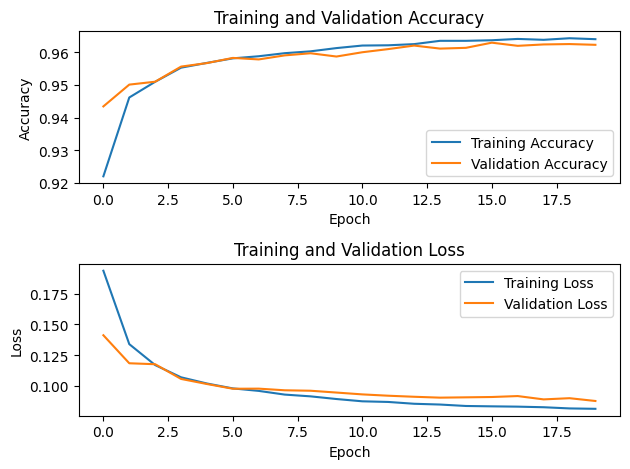

In [24]:
# Plot training history for accuracy
plt.subplot(2, 1, 1)
plt.plot(history.history["accuracy"], label = "Training Accuracy")
plt.plot(history.history["val_accuracy"], label = "Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Plot training history for loss
plt.subplot(2, 1, 2)
plt.plot(history.history["loss"], label = "Training Loss")
plt.plot(history.history["val_loss"], label = "Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.tight_layout()
plt.show()

# Model Testing and Evaluation

In [25]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [26]:
y_pred = np.argmax(model.predict(X_test), axis = 1)

812/812 [==============================] - 1s 887us/step


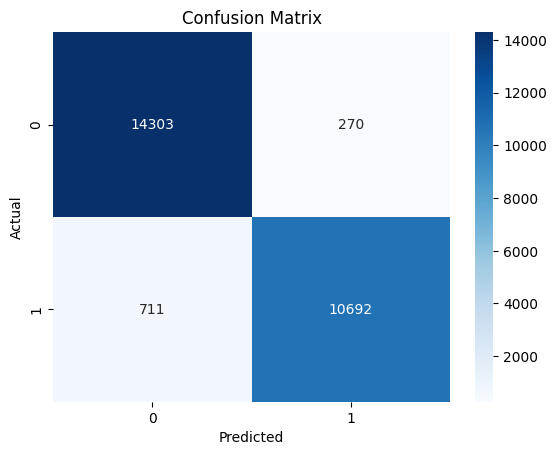

In [27]:
cmt = confusion_matrix(y_test, y_pred)
sns.heatmap(cmt, annot = True, fmt = "d", cmap = "Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [28]:
report = classification_report(y_test, y_pred, target_names = class_map.keys())
print("Classification Report:")
print(report)

Classification Report:
                         precision    recall  f1-score   support

neutral or dissatisfied       0.95      0.98      0.97     14573
              satisfied       0.98      0.94      0.96     11403

               accuracy                           0.96     25976
              macro avg       0.96      0.96      0.96     25976
           weighted avg       0.96      0.96      0.96     25976

